##Assignment 5: Image Classification

###Done By:
####Bragadesh Bharatwaj Sundararaman
####Calvin Smith
####Amogha Udhayakumar

In [1]:
import numpy as np
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Reshape
from tensorflow.keras.models import Sequential
from tensorflow.keras import callbacks
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# PART 1: Training a convolutional neural network

In [3]:
data_gen = ImageDataGenerator(rescale=1.0/255)

In [4]:
imgdir = '/content/drive/MyDrive/a5_images/a5_images'
img_size = 64
batch_size = 32

train_generator = data_gen.flow_from_directory(
        imgdir + '/train',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=True)

Found 1600 images belonging to 2 classes.


In [5]:
validation_generator = data_gen.flow_from_directory(
        imgdir + '/validation',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=True)

Found 576 images belonging to 2 classes.


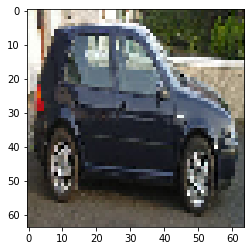

In [6]:
Xbatch, Ybatch = train_generator.next()
plt.imshow(Xbatch[4])

In [7]:
# Function that creates a convolutional neural network using Keras.
# The CNN is comprised of 3 blocks of a convolutional layer + max pooling, a flatten layer, and two dense layers.
# The convolutional layers uses a ReLU activation function and the output layer uses a sigmoid activation function.

def make_convnet():
  
  model = Sequential()

  model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                   activation='relu',
                   input_shape=(img_size, img_size, 3)))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

  model.add(Conv2D(64, (5, 5), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(128, (5, 5), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Flatten())
  model.add(Dense(128, activation='relu'))

  model.add(Dense(1, activation='sigmoid'))

  return model

In [8]:
#Using early stopping to prevent some overfitting

early_stopping = callbacks.EarlyStopping(monitor='val_loss', 
                                         patience=3, verbose=1, mode='min',
                                         restore_best_weights=True)

CNN_model = make_convnet()

# Using binary crossentropy as loss function and the Adam optimizer for training
CNN_model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

# Fitting the model using 40 epochs and the image generator generates 32 images at time.
history = CNN_model.fit(train_generator,
                        epochs=40,
                        verbose=1,
                        validation_data=validation_generator,
                        callbacks=[early_stopping])

CNN_model.save_weights('/content/drive/MyDrive/a5_images')

Epoch 1/40
50/50 [==============================] - 340s 7s/step - loss: 0.6572 - accuracy: 0.6269 - val_loss: 0.6153 - val_accuracy: 0.6667
Epoch 2/40
50/50 [==============================] - 8s 169ms/step - loss: 0.5815 - accuracy: 0.6969 - val_loss: 0.5803 - val_accuracy: 0.7257
Epoch 3/40
50/50 [==============================] - 8s 168ms/step - loss: 0.5162 - accuracy: 0.7613 - val_loss: 0.5459 - val_accuracy: 0.7344
Epoch 4/40
50/50 [==============================] - 8s 169ms/step - loss: 0.4904 - accuracy: 0.7706 - val_loss: 0.5327 - val_accuracy: 0.7396
Epoch 5/40
50/50 [==============================] - 8s 168ms/step - loss: 0.4450 - accuracy: 0.7987 - val_loss: 0.5385 - val_accuracy: 0.7431
Epoch 6/40
50/50 [==============================] - 8s 167ms/step - loss: 0.4095 - accuracy: 0.8119 - val_loss: 0.5272 - val_accuracy: 0.7674
Epoch 7/40
50/50 [==============================] - 8s 166ms/step - loss: 0.3503 - accuracy: 0.8581 - val_loss: 0.5303 - val_accuracy: 0.7569
Epoch 8

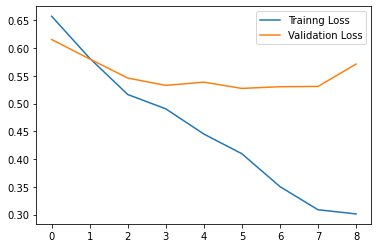

In [9]:
# Plotting training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Trainng Loss', 'Validation Loss'])

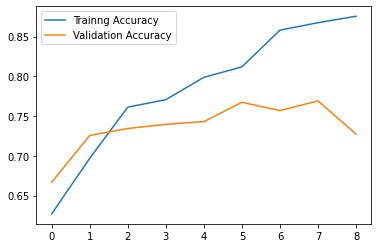

In [10]:
# Plotting training and validation accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Trainng Accuracy', 'Validation Accuracy'])

Comments on the plots:

- When we look at the plots can see a pretty clear sign of overfitting (although we used early stopping to mitigate some extent of overfitiing).

- In the case of the loss, the validation loss decreases in the beginning but then steadily increases as the training loss just keeps decreasing.
- Similarly the validation accuracy starts increasing initially but then clearly drops after some epochs, while the training accuracy keeps increasing.

# PART 2: Data augmentation

In [11]:
# Creating a new Image data generator with the following parameters:
# rotation range = 20 (rotates the image using the specified int in degrees)
# zoom_range = 0.1(Range for random zoom)
# horizontal_flip = True (This randomly flips inputs horizontally)
# width_shift_range = 0.1 (shifts the set percentage of the image by width)
# height_shift_range = 0.1 (shifts the set percentage of the image by height)
# brightness_range (darkens/brightens the image based on set value)

data_aug_gen = ImageDataGenerator(rescale=1.0/255, rotation_range=20,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  horizontal_flip=True,
                                  zoom_range=0.1,
                                  brightness_range=[0.9,1.1])

In [12]:
train_aug_generator = data_aug_gen.flow_from_directory(
        imgdir + '/train',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=True)

Found 1600 images belonging to 2 classes.


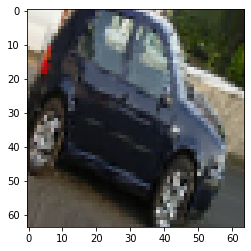

In [13]:
Xbatch, Ybatch = train_aug_generator.next()
plt.imshow(Xbatch[4])

In [14]:
early_stopping = callbacks.EarlyStopping(monitor='val_loss', 
                                         patience=3, verbose=1, mode='min',
                                         restore_best_weights=True)

CNN_aug_model = make_convnet()

CNN_aug_model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

# Training model again using the new training image generator.
# The validtion images are generated from the same generator as in part 1.

history_aug = CNN_aug_model.fit(train_aug_generator,
                                epochs=40,
                                verbose=1,
                                validation_data=validation_generator,
                                callbacks=[early_stopping])

CNN_aug_model.save_weights('/content/drive/MyDrive/a5_images')

Epoch 1/40
50/50 [==============================] - 12s 235ms/step - loss: 0.6546 - accuracy: 0.6169 - val_loss: 0.6384 - val_accuracy: 0.6528
Epoch 2/40
50/50 [==============================] - 11s 227ms/step - loss: 0.6145 - accuracy: 0.6806 - val_loss: 0.5799 - val_accuracy: 0.7170
Epoch 3/40
50/50 [==============================] - 11s 230ms/step - loss: 0.5578 - accuracy: 0.7262 - val_loss: 0.5879 - val_accuracy: 0.7188
Epoch 4/40
50/50 [==============================] - 12s 231ms/step - loss: 0.5488 - accuracy: 0.7262 - val_loss: 0.5275 - val_accuracy: 0.7535
Epoch 5/40
50/50 [==============================] - 12s 232ms/step - loss: 0.5123 - accuracy: 0.7475 - val_loss: 0.5317 - val_accuracy: 0.7535
Epoch 6/40
50/50 [==============================] - 12s 231ms/step - loss: 0.5023 - accuracy: 0.7606 - val_loss: 0.5552 - val_accuracy: 0.7587
Epoch 7/40
50/50 [==============================] - 12s 232ms/step - loss: 0.4950 - accuracy: 0.7544 - val_loss: 0.5105 - val_accuracy: 0.7517

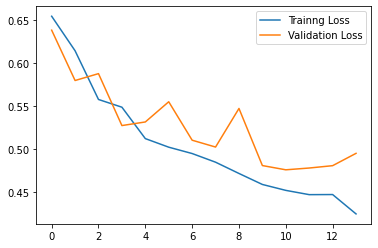

In [15]:
# Plotting training and validation loss

plt.plot(history_aug.history['loss'])
plt.plot(history_aug.history['val_loss'])
plt.legend(['Trainng Loss', 'Validation Loss'])

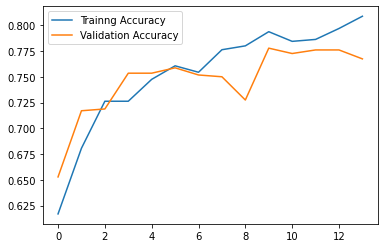

In [16]:
# Plotting training accuracy

plt.plot(history_aug.history['accuracy'])
plt.plot(history_aug.history['val_accuracy'])
plt.legend(['Trainng Accuracy', 'Validation Accuracy'])

Comments on the results after applying data augmentation and retraining the model:

- Validation loss and accuracy are both improved. Validation loss decreases from 0.571 to 0.495 and validation accuracy increases from 0.727 to 0.767.

- It is clear that this effect is due to the data augmentation that we performed. We can also note that the training accuracy slightly dips (while the validation accuracy increases), which is also expected since we are providing augmented data as input.

- There is still some indication of overfitting, but it is substantially improved compared to part 1. We can see this by noticing that the gap between the training and validation curves (for both loss and accuracy) have decreased.

# Interlude: Applying a pre-trained convolutional neural network

In [17]:
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import decode_predictions, preprocess_input

In [18]:
vggmodel = applications.VGG16(weights='imagenet', include_top=True)

553476096/553467096 [==============================] - 5s 0us/step


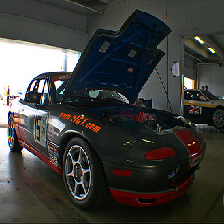

In [19]:
org_image = load_img('/content/drive/MyDrive/a5_images/a5_images/validation/car/0011.jpg',target_size = (224,224))
org_image

In [20]:
img_array = preprocess_input(img_to_array(load_img('/content/drive/MyDrive/a5_images/a5_images/validation/car/0011.jpg', target_size=(224,224))))
final_img = img_array.reshape(1, 224, 224, 3)

In [21]:
prediction = vggmodel.predict(final_img)

In [22]:
applications.vgg16.decode_predictions(prediction)

49152/35363 [=========================================] - 0s 0us/step


[[('n04037443', 'racer', 0.5991588),
  ('n04285008', 'sports_car', 0.13066348),
  ('n04461696', 'tow_truck', 0.0769494),
  ('n02974003', 'car_wheel', 0.044112742),
  ('n03670208', 'limousine', 0.043648943)]]

The VGG-16 models predictions can be seen above. The input image was a race car. All the VGG-16 predictions are related to cars in some way, which seems reasonable. The top prediction is "racer", which is correct.

# PART 3: Using VGG-16 as a feature extractor

In [23]:
feature_extractor = applications.VGG16(include_top=False, weights='imagenet',
                                       input_shape=(img_size, img_size, 3))

58900480/58889256 [==============================] - 1s 0us/step


In [39]:
vgg_data_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [40]:
# Function that given a directory, generates features using the vgg-16 model
# The function saves the features to the file in the directory dir for
# train and validation separately.

def create_vgg16_features(dataset):
  
  vgg_generator = vgg_data_gen.flow_from_directory(
      imgdir + '/' + dataset,
      target_size=(img_size, img_size),
      batch_size=batch_size,
      class_mode='binary',
      classes=['other', 'car'],
      seed=12345,
      shuffle=False)
  
  
  feature_val = feature_extractor.predict(vgg_generator)

  if dataset == 'train':
    t = 'vgg_train_features'
    
  else:
    t = 'vgg_val_features'

  with open('/content/drive/MyDrive/a5_images/'+ t, 'wb') as f:
    np.save(f, feature_val)

In [41]:
# creating training and validation features and saving to vgg_train_features and vgg_val_features

create_vgg16_features('train')
create_vgg16_features('validation')

Found 1600 images belonging to 2 classes.
Found 576 images belonging to 2 classes.


In [42]:
# The function to get the class labels

def get_labels(n):
    return np.array([0]*(n//2) + [1]*(n//2))

In [43]:
# The new CNN model for implementing the transfer learning

def make_transfernet():
  
  model = Sequential()

  model.add(Flatten(input_shape = (2,2,512)))

  model.add(Dense(128, activation='relu'))

  model.add(Dense(1, activation='sigmoid'))

  return model

In [44]:
# Function that loads the training and valdiation data and trains the new cnn classifier

def train_on_cnnfeatures():

  with open('/content/drive/MyDrive/a5_images/vgg_train_features', 'rb') as f:
    train_data = np.load(f)

  with open('/content/drive/MyDrive/a5_images/vgg_val_features', 'rb') as f:
    val_data = np.load(f)

  early_stopping = callbacks.EarlyStopping(monitor='val_loss', 
                                         patience=5, verbose=1, mode='min',
                                         restore_best_weights=True)

  vgg_cnn_model = make_transfernet()

  vgg_cnn_model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
  
  Y_train = get_labels(len(train_data))
  Y_val = get_labels(len(val_data))

  history_vgg = vgg_cnn_model.fit(x = train_data,
                                  y = Y_train,
                                  epochs=40,
                                  verbose=1,
                                  validation_data=(val_data, Y_val),
                                  callbacks=[early_stopping])
  
  return history_vgg

In [47]:
history_vgg = train_on_cnnfeatures()

Epoch 1/40
50/50 [==============================] - 1s 8ms/step - loss: 2.0269 - accuracy: 0.8413 - val_loss: 1.0328 - val_accuracy: 0.8785
Epoch 2/40
50/50 [==============================] - 0s 4ms/step - loss: 0.1598 - accuracy: 0.9669 - val_loss: 0.8355 - val_accuracy: 0.8906
Epoch 3/40
50/50 [==============================] - 0s 5ms/step - loss: 0.0200 - accuracy: 0.9944 - val_loss: 0.7700 - val_accuracy: 0.9045
Epoch 4/40
50/50 [==============================] - 0s 5ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.7495 - val_accuracy: 0.8976
Epoch 5/40
50/50 [==============================] - 0s 5ms/step - loss: 8.5595e-04 - accuracy: 1.0000 - val_loss: 0.7622 - val_accuracy: 0.9062
Epoch 6/40
50/50 [==============================] - 0s 5ms/step - loss: 5.2503e-04 - accuracy: 1.0000 - val_loss: 0.7652 - val_accuracy: 0.9062
Epoch 7/40
50/50 [==============================] - 0s 5ms/step - loss: 4.0411e-04 - accuracy: 1.0000 - val_loss: 0.7683 - val_accuracy: 0.9062
Epoch 8/

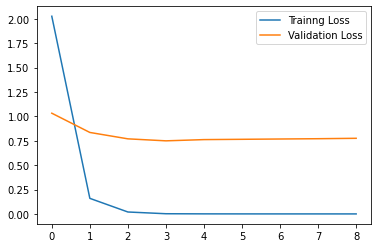

In [48]:
plt.plot(history_vgg.history['loss'])
plt.plot(history_vgg.history['val_loss'])
plt.legend(['Trainng Loss', 'Validation Loss'])

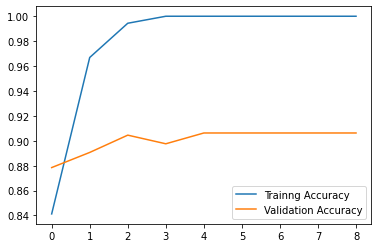

In [49]:
plt.plot(history_vgg.history['accuracy'])
plt.plot(history_vgg.history['val_accuracy'])
plt.legend(['Trainng Accuracy', 'Validation Accuracy'])

Comments on the results:

The accuracy is substantially improved to 0.906 from the previous best of 0.767. The reason is:

- Our data consists of a modest 1600 images. The VGG-16 model is trained on ImageNet which contains over 14 million annotated images. By using the pre-trained weights from VGG-16 developed on the imagenet dataset, we can utlize the information provided by 14 million images on our small dataset of 1600 images.
- The VGG-16 model is MUCH larger and more advanced compared to our own classifier, it consists of 138.4 Million parameters. This leads to the significant increase in accuracy.

# Part 4: Visualizing the learned features

In [33]:
# Get the weights from the first layer
first_layer_weights = vggmodel.get_weights()[0]
first_layer_weights.shape

(3, 3, 3, 64)

In [34]:
# Function that returns an image based on the weights, which filter and whether to return
# the positve or negative part of the filter
def kernel_image(weights, i, positive):
    
    # extract the convolutional kernel at position i
    k = weights[:,:,:,i].copy()
    if not positive:
        k = -k
    
    # clip the values: if we're looking for positive
    # values, just keep the positive part; vice versa
    # for the negative values.
    k *= k > 0

    # rescale the colors, to make the images less dark
    m = k.max()
    if m > 1e-3:
        k /= m 

    return k

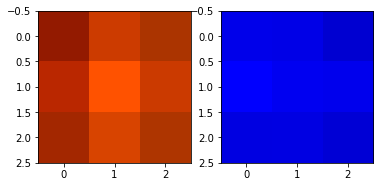

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(kernel_image(first_layer_weights,1,True))
ax2.imshow(kernel_image(first_layer_weights,1,False))

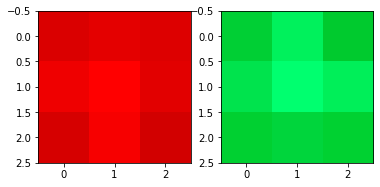

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(kernel_image(first_layer_weights,5,True))
ax2.imshow(kernel_image(first_layer_weights,5,False))

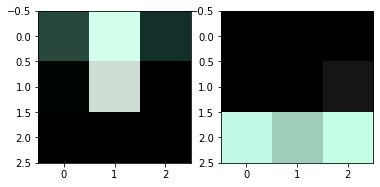

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(kernel_image(first_layer_weights,10,True))
ax2.imshow(kernel_image(first_layer_weights,10,False))